# Lepton Scale Factor Uncertainty

Lepton scale factors are determined using the tag and probe meathod within the Z peak.  The scale factors are determined in bins of pt and eta. We use these scale factors as event weights. To determine the uncertainty on the cross-section via the lepton event weights the following was done. We shift each scale factor by random amount picked from a gaussian distribution taking the orginal scale factor and associated errors as the mean value and standard deviation respectively. The events weights are then reapplied using the new scale factors.  This processes is done 100 times. Each time we take the mean of the lepton event weights. After 100 toys have been thrown and the mean calculated we determine the standard deviation of that result, &sigma;<sub>$\bar{w}$</sub>. 
<code>
for i in ptbins:
    for j in etabins:
        scalefactors[i][j] += gaussian(scalefactors[i][j], errors[i][j])
</code>



## Simple Cases

To validate our methodology work through two simple cases. The first assumes we have a set of events with the same weight.  Lets say they come from the sme pt and eta bin so they have the same errors as well. We'll let the starting weight to be .99 and the std to be .01. We throw 100 toy with 10<sup>5</sup> events each.  With this set up we expect our resut to be ~ .01 because we have 100 unique values pulled from a gaussian with a mean of .99 and std of .01.

The result give us a std of .009 which is approxiately ~.01.

In [39]:
# Run 100 toys
toy_set = []
for i in xrange(100):
    toy_set.append(.99 * np.ones(10**5) + np.random.normal(0, .01,))#toy())
toy_set = np.array(toy_set)

print toy_set.mean(1).std()

0.00936815063549


The second case is abit closer to the use case. We take a 90000 events as beening in one pt and eta bin and 10000 events as coming from another. We say that both regions have the same scale factor but different error bars, .01 for the first and .02 for the second. We can calculate this from the variance.

$$
x = \alpha x_1 + \beta x_2 \\
Var(x) = \alpha^2 Var(x_1) + \beta^2 Var(x_2) \\
then \\
\sigma(x) = \sqrt{\alpha^2 \sigma(x_1)^2 + \beta^2 \sigma(x_2)^2}
$$

Where alpha is the x is the mean weight thus &alpha; and &beta; are the fraction number of events associated to that scale factor that are in the set. 

We find the std to be 0.0092. When running out toys we get 0.0087.

In [42]:
a = (90000. / 100000)
b = (10000. / 100000)
sig_1 = .01
sig_2 = .02
print (a**2 * sig_1**2 +  b**2 * sig_2**2)**.5

0.009219544457292887

In [48]:
toy_set = []
for i in xrange(100):
    l1 = list(.99 * np.ones(10**5 - 10**4) + np.random.normal(0, .01,))
    l1 += list(.99 * np.ones(10**4) + np.random.normal(0, .02,))
    toy_set.append( np.array(l1))
toy_set = np.array(toy_set)
print toy_set.mean(1).std()

0.00872112099147


When plotting the function of the std in relation of the fraction of events that are type 1 scale factor we get the following.

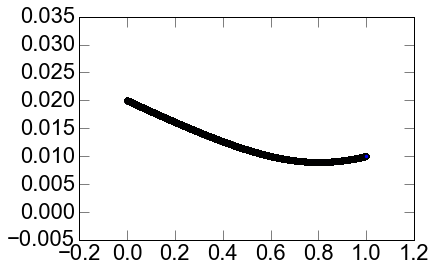

In [44]:
x = [i /100000. for i in range(100000) ]
y = [ (i**2 * .01**2 + (1-i)**2 * .02**2)**.5 for i in x ]
plt.scatter(x,y)

## Use case
Set up

In [49]:
run ../prep_ana.py

Loading plotting specs...
8 or 13 TeV:8TeV
unc_mc_process and scales as dictionaries
Load MC and Data?False
df = pd.concat([df_dy0, df_dy1, df_dy2, df_dy3, df_dy4, df_dy_m_10, df_ww, df_tt_l, df_tt_sl, df_zz_ln, df_wz_ln, df_wz_lq ])


In [50]:
%matplotlib inline

In [51]:
columns = ['lep1_pt', 'lep2_pt', 'lep1_eta', 'lep2_eta', 'lep1_type', 'lep2_type', 'mu_id_weight','el1_id_weight','el2_id_weight', 'lep1_id_error_high', 'lep2_id_error_high',\
          'lep1_id_error_low', 'lep2_id_error_low']

df_dy0 = rp.read_root(data_path+"/dyjetstoll_m-50_complete.root", columns=columns)
df_dy_m_10 = rp.read_root(data_path+"/dyjetstoll_m-10to50_complete.root", columns=columns)
df_ww = rp.read_root(data_path+"/ww_complete.root", columns=columns)
df_tt_l = rp.read_root(data_path+"/ttbar_leptonic_complete.root", columns=columns)
df_tt_sl = rp.read_root(data_path+"/ttbar_semileptonic_complete.root", columns=columns)
df_tbar_tw = rp.read_root(data_path+"/tbar_tw-_complete.root", columns=columns)
df_tbar_s = rp.read_root(data_path+"/tbar_s-_complete.root", columns=columns)
df_tbar_t = rp.read_root(data_path+"/tbar_t-_complete.root", columns=columns)
df_t_tw = rp.read_root(data_path+"/t_tw-_complete.root", columns=columns)
df_t_s = rp.read_root(data_path+"/t_s-_complete.root", columns=columns)
df_t_t = rp.read_root(data_path+"/t_t-_complete.root", columns=columns)
df_zz_lq = rp.read_root(data_path+"/zzjetsto2l2q_complete.root", columns=columns)
df_zz_ln = rp.read_root(data_path+"/zzjetsto2l2nu_complete.root", columns=columns)
df_wz_lq = rp.read_root(data_path+"/wzjetsto2l2q_complete.root", columns=columns)
df_wz_ln = rp.read_root(data_path+"/wzjetsto3lnu_complete.root", columns=columns)

#May want to turn this off
df_wj1 = rp.read_root(data_path+"/w1jetstolnu_complete.root", columns=columns)
df_wj2 = rp.read_root(data_path+"/w2jetstolnu_complete.root", columns=columns)
df_wj3 = rp.read_root(data_path+"/w3jetstolnu_complete.root", columns=columns)
df_wj4 = rp.read_root(data_path+"/w4jetstolnu_complete.root", columns=columns)

#Other stuff that I might want to turn off
df_wg = rp.read_root(data_path+"/wg_complete.root", columns=columns)


df = pd.concat([df_dy0, df_dy_m_10, df_ww, df_tt_l, df_tt_sl, df_tbar_s, df_tbar_t, df_tbar_tw, df_t_s, df_t_t, df_t_tw, df_zz_lq, df_zz_ln, df_wz_ln, df_wz_lq,
              df_wj1, df_wj2, df_wj3, df_wj4, df_wg])

### Muon Implementation

Applying this technique to muons we select unique pt and eta bins from unique error tags. We take the mean of the error bars as our standard deviation and apply out gaussian offset to the the muon id weight. It is worth mentioning that this weight is the multiple the leading and sub leading muons (if appropiate). Since the muon scale factors are about 1, and generally a little lower it is with in reason that we add the our off sets directly to the total muon scale factor. 

$$
\mu_{tot} = \mu_1  \mu_2 \\
so \\
\mu_{tot} = (\mu_1 + \delta_1)  (\mu_2 + \delta_2) \\
\mu_{tot}' = \mu_1  \mu_2  + \delta_1 \mu_2 + \delta_2 \mu_1 + \delta_1 \delta_2 \\ 
\delta_1 \delta_2 \rightarrow 0 
and \\
\delta_x \sim 1 \\
\mu_{tot}' \simeq \mu_1  \mu_2  + \mu_1 +\mu_2
$$

Running over 100 toy samples the rms was found to be 0.00043.

0.0131639 0.00545784


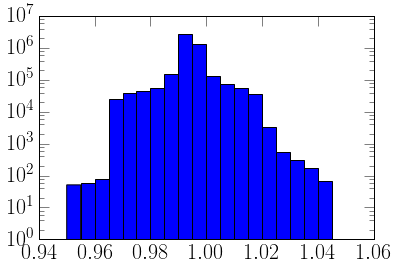

In [65]:
plt.hist(mu_id_eff, bins=20, range=(.95,1.05))
plt.yscale('log')
print np.unique(mu_id_eff).std(), mu_id_eff.std()

In [55]:
mu_id_eff = 1 * df[(df.lep1_type == 13) & (df.lep2_type == 13)].mu_id_weight.values
low_1 = 1 * df[(df.lep1_type == 13) & (df.lep2_type == 13)].lep1_id_error_low.values
high_1 = 1 * df[(df.lep1_type == 13) & (df.lep2_type == 13)].lep1_id_error_high.values
low_2 = 1 * df[(df.lep1_type == 13) & (df.lep2_type == 13)].lep2_id_error_low.values
high_2 = 1 * df[(df.lep1_type == 13) & (df.lep2_type == 13)].lep2_id_error_high.values

In [44]:
#Double check uniqueness
for i in a:
    print i, np.unique(high[low == i])

0.000239149 [ 0.0002389]
0.000266026 [ 0.00026572]
0.000414817 [ 0.00041246]
0.000479106 [ 0.00047719]
0.00053711 [ 0.00053501]
0.000587615 [ 0.00058479]
0.000655459 [ 0.00065232]
0.000706583 [ 0.00070372]
0.000769155 [ 0.00076414]
0.000773876 [ 0.00076996]
0.000859489 [ 0.00085606]
0.000926239 [ 0.00092186]
0.00103791 [ 0.00103232]
0.00104393 [ 0.00103566]
0.00123488 [ 0.00122485]
0.00138759 [ 0.0013776]
0.00141755 [ 0.00141401]
0.00155262 [ 0.00154479]
0.00164344 [ 0.00163837]
0.00196001 [ 0.0019409]
0.00250396 [ 0.00249344]
0.00316356 [ 0.00313606]
0.00538083 [ 0.00535135]
0.00628191 [ 0.00619454]
0.0172591 [ 0.01738158]
0.0291727 [ 0.03009883]
0.0345151 [ 0.03207362]


In [66]:
#! Apply the sub lepton errors as well
a = np.unique(low_1) #Unique low errors
def toy():
    rt_eff = 1 * mu_id_eff #1 * np.array to make sure we return a copy
    for i in a:
        b_1 = ((low_1[low_1 == i] +  high_1[ low_1 == i]) / 2)[0] #standard deviation
        c = np.random.normal(0, b_1,) #delta 1
        rt_eff[low_1 == i] = mu_id_eff[low_1 == i] + c
        rt_eff[low_2 == i] = mu_id_eff[low_2 == i] + c

    return rt_eff

In [67]:
# Run 100 toys
toy_set = []
for i in xrange(100):
    toy_set.append(toy())
toy_set = np.array(toy_set)
print toy_set.mean(1)[:3], toy_set.mean(), toy_set.mean(1).std()

[ 0.99398565  0.99498409  0.99469775] 0.99455 0.000436943


### Electon Implementation

The electron weights were handled in a similiar fashion.  However the errorbars had to be handled by hand. 

The results are 0.0012.

In [68]:
a1 = {(0.0, 0.8): {0.827 : 0.021, 0.924 :0.010, 0.960 : 0.003 , 0.978: 0.001, 0.981: 0.001, 0.982: 0.002 },\
(0.8, 1.442): {0.948: (0.024+ 0.023) / 2, 0.932: 0.012, 0.936 : 0.004, 0.958: 0.002, 0.969: 0.001, 0.969: 0.002},\
(1.442, 1.556): {1.073: (0.117+ 0.107) / 2, 0.808:  (0.045+ 0.042) / 2,\
                            0.933: (0.015+ 0.017) / 2, 0.907: 0.008, 0.904: 0.004, 0.926: 0.011},\
(1.556, 2.0): {0.854: (0.048 + 0.047) / 2, 0.853: 0.022, 0.879: 0.007, 0.909: 0.003, 0.942: 0.002, 0.957: 0.004 },\
(2.0, 2.5):{1.007: (0.047+ 0.046)/2, 0.903: 0.029, 0.974: 0.004, 0.987: 0.004, 0.991: 0.003, 0.999: 0.005 }}

In [69]:
el1_id_eff = 1 * df[(df.lep1_type == 11) & (df.lep2_type == 11)].el1_id_weight.values
el2_id_eff = 1 * df[(df.lep1_type == 11) & (df.lep2_type == 11)].el2_id_weight.values
eta_1 = 1 * df[(df.lep1_type == 11) & (df.lep2_type == 11)].lep1_eta.values
eta_2 = 1 * df[(df.lep1_type == 11) & (df.lep2_type == 11)].lep2_eta.values

In [70]:
df_ = df[(df.lep1_type == 11) & (df.lep2_type == 11) ]
def toy():
    el1_eff = 1 * el1_id_eff #1 * np.array to make sure we return a copy
    el2_eff = 1 * el2_id_eff
    for i in a1:
        for j in a1[i]:
            b_1 = (i[0] < df_.lep1_eta.abs()) &  (df_.lep1_eta.abs() < i[1]) & (df_.el1_id_weight == j)
            b_2 = (i[0] < df_.lep2_eta.abs()) &  (df_.lep2_eta.abs() < i[1]) & (df_.el2_id_weight == j)
            c = np.random.normal(0, a1[i][j])
            el1_eff[b_1] = el1_id_eff[b_1] +  c
            el2_eff[b_2] = el2_id_eff[b_2] + c

    return el1_eff * el2_eff

In [71]:
toy_set_el = []
for i in xrange(100):
    toy_set_el.append(toy())
toy_set_el = np.array(toy_set_el)

print toy_set_el.mean(1)[:3], toy_set_el.mean(), toy_set_el.mean(1).std()

[ 0.93247861  0.93370134  0.93306619] 0.933294 0.00125073


### Electron, Muon Combination

Result 0.00051796

- Muon: 0.00043
- Electron: 0.0012
- Electron and Muon : 0.00051


In [72]:
mu_id_eff = 1 * df.mu_id_weight.values 
el1_id_eff = 1 * df.el1_id_weight.values
el2_id_eff = 1 * df.el2_id_weight.values

lep1_type = 1 * df.lep1_type.values
lep2_type = 1 * df.lep2_type.values

low_1 = 1 * df.lep1_id_error_low.values
high_1 = 1 * df.lep1_id_error_high.values
low_2 = 1 * df.lep2_id_error_low.values

lep1_eta = 1 * df.lep1_eta.values
lep2_eta = 1 * df.lep2_eta.values

mu_unique = np.unique(low_1)#Unique low errors

In [73]:
el_unc = a1
def toy():
    mu_eff = 1 * mu_id_eff
    el1_eff = 1 * el1_id_eff #1 * np.array to make sure we return a copy
    el2_eff = 1 * el2_id_eff
    
    mu1_mask = lep1_type == 13
    mu2_mask = lep2_type == 13
    el1_mask = lep1_type == 11
    el2_mask = lep2_type == 11
    
    #Electrons
    for i in el_unc:
        for j in el_unc[i]:
            b_1 = (i[0] < np.abs(lep1_eta)) &  (np.abs(lep1_eta) < i[1]) & (el1_eff == j)
            b_2 = (i[0] < np.abs(lep2_eta)) &  (np.abs(lep2_eta) < i[1]) & (el2_eff == j)
            c = np.random.normal(0, el_unc[i][j])
            el1_eff[b_1 & el1_mask ] = el1_id_eff[b_1 & el1_mask] +  c
            el2_eff[b_2 & el2_mask] = el2_id_eff[b_2 & el2_mask] + c
            
    #Muons
    for i in mu_unique:
        low_1_mask = low_1 == i
        low_2_mask = low_2 == i
        b_1 = ((low_1[low_1_mask] +  high_1[ low_1_mask ]) / 2)[0] #standard deviation
        c = np.random.normal(0, b_1,) #delta 1
        mu_eff[low_1_mask & mu1_mask] = mu_eff[low_1_mask & mu1_mask] + c
        mu_eff[low_2_mask & mu2_mask] = mu_eff[low_2_mask & mu2_mask] + c
        
    #Remove Zeros
    mu_id_eff[mu_id_eff == 0] = 1.
    el1_eff[el1_eff == 0] = 1.
    el2_eff[el2_eff == 0] = 1.
    
    return mu_id_eff * el1_eff * el2_eff

In [74]:
toy_set = []
for i in xrange(100):
    toy_set.append(toy())
toy_set = np.array(toy_set)

In [75]:
print toy_set.mean(1)[:3], toy_set.mean(), toy_set.mean(1).std()

[ 0.96715891  0.96745449  0.96703565] 0.96775 0.00051796
